## Singapore Birth Rate & Fertility Analysis

### GA Capstone Project - Lester

<a id="home"></a>

## Contents

- [Problem, Goals and Audience](#problem)
- [Data Sources and Preparation](#data-sources)
- [Exploratory Data Analysis (EDA)](#eda)
- [Feature Engineering](#feature-engineering)
- [Predictive Modelling](#predictive-model)
- [Model Performance](#model-performance)
- [Model Interpretation](#model-interpretation)
- [Assumptions](#assumptions)
- [Limitations](#limitations)
- [Conclusions and Next Steps](#next-steps)
- [Technical Report](#technical-report)


<a id="problem"></a>

## Problem, Goals and Audience

### Problem Statement

Singapore’s total fertility rate (TFR) and resident live births have decline steadily over the past few decades.  
This long-term trend raises concerns about population ageing, labour force sustainability, and overall economic stability.

This project examines historical fertility and birth data to understand the scale, pattern, and structure of this decline.

### Project Goals

This project aims to:

- Analyse long-term trends in total fertility rate and resident live births in Singapore
- Identify major patterns and structural shifts over time
- Build and evaluate at least one predictive model using historical data

### Criteria for Success

This project is considered successful if it:

- Clearly explains the key fertility and birth trends shown in the data
- Uses statistical analysis to support conclusions
- Provides insights that support discussion on population and workforce planning

### Intended Audience

This analysis is written for policymakers and planners involved in population policy, workforce development, and long-term socio-economic planning in Singapore.


<a id="data-sources"></a>

## Data Sources

This project uses data from official Singapore government statistics. The data is downloaded in CSV format.

The main datasets used are:

- **`M810091-table.csv`** – Total Fertility Rate (TFR) by year - https://tablebuilder.singstat.gov.sg/table/TS/M810091
- **`M810761-table.csv`** – Births And Fertility Rates - https://tablebuilder.singstat.gov.sg/table/TS/M810761

The HDB Resale Price Index is included as a contextual economic indicator for extended modelling.
- **`M212161-table.csv`** - HDB Resale Price Index - https://tablebuilder.singstat.gov.sg/table/TS/M212161

These datasets are chosen because they:

- Come from an official source
- Cover many years, so long-term trends can be studied
- Are directly related to fertility and birth patterns
- Are structured in a way that can be used for time-series analysis and modelling

Main datasets provide yearly national data, which allows the analysis of how fertility in Singapore changes over time.


## Data Preparation

This section explains how the datasets will be checked and prepared before analysis.

The goal is to make sure the data is correct, consistent, and suitable for time-series analysis and modelling.

### Data Cleaning Steps

The following steps will be carried out:

1. Import the required Python libraries
2. Load the CSV files into pandas DataFrames
3. Check the structure and column names
4. Make sure the data types are correct
5. Check for missing values
6. Check for duplicate rows
7. Review the minimum and maximum values
8. Convert the datasets from wide format to long format
9. Check the structure again after reshaping
10. Save the cleaned datasets for modelling

### Structural Checks

The datasets will be checked using `.shape()` and `.info()` to confirm:

- The number of rows and columns
- The data types of each column
- Whether there are null values
- Whether there are duplicate rows

If any issues are found, they will be fixed before moving on.

### Missing and Duplicate Values

All columns will be checked for missing and duplicate values.  
If any are found, they will be handled to keep the data clean.

### Value Checks

The minimum and maximum values will be reviewed to make sure they are reasonable.  
If any values look unusual, they will be examined further.

### Data Transformation

The original datasets are in wide format, where each year is a separate column.

For analysis and modelling, the datasets will be converted into long format using `pandas.melt()`. This makes it easier to:

- Sort data by year
- Analyse trends over time
- Merge datasets
- Build time-series models

After reshaping, the data will be checked again to make sure everything is correct.

### Data Suitability

After cleaning and reshaping, the datasets will be ready for exploratory analysis and predictive modelling.


In [53]:
import pandas as pd

# Load datasets
tfr_df = pd.read_csv("../data_cleaned/raw/M810091/M810091-table extract.csv")
births_df = pd.read_csv("../data_cleaned/raw/M810761/M810761-table extract.csv")

print("Datasets loaded successfully.")

Datasets loaded successfully.


In [54]:
# Check dataset shapes
print("TFR shape:", tfr_df.shape)
print("Births shape:", births_df.shape)

print("\nTFR dataset info:")
tfr_df.info()

print("\nBirths dataset info:")
births_df.info()

TFR shape: (1, 66)
Births shape: (6, 36)

TFR dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Data Series  1 non-null      object 
 1   2024         1 non-null      float64
 2   2023         1 non-null      float64
 3   2022         1 non-null      float64
 4   2021         1 non-null      float64
 5   2020         1 non-null      float64
 6   2019         1 non-null      float64
 7   2018         1 non-null      float64
 8   2017         1 non-null      float64
 9   2016         1 non-null      float64
 10  2015         1 non-null      float64
 11  2014         1 non-null      float64
 12  2013         1 non-null      float64
 13  2012         1 non-null      float64
 14  2011         1 non-null      float64
 15  2010         1 non-null      float64
 16  2009         1 non-null      float64
 17  2008         1 non-null      float64

### Structural Inspection Results

The TFR dataset contains 1 row and 66 columns. It includes yearly Total Fertility Rate values from 1960 to 2024.

The first column, `Data Series`, is stored as an object type.  
All year columns (1960–2024) are stored as `float64`, which is appropriate since TFR values are numerical and include decimals.

The `.info()` output shows that there are no missing values in the dataset.

The Births dataset contains 6 rows and 36 columns. It includes resident live birth data from 1990 to 2024 across different categories.

The first column, `Data Series`, is stored as an object type.  
All year columns (1990–2024) are stored as `int64`, which is expected since birth counts are whole numbers.

The `.info()` output confirms that there are no missing values in this dataset.


In [55]:
# Check for missing values anyways
print("TFR Missing Values:")
print(tfr_df.isnull().sum())

print("\nBirths Missing Values:")
print(births_df.isnull().sum())

# Check for duplicate rows
print("\nTFR Duplicates:", tfr_df.duplicated().sum())
print("Births Duplicates:", births_df.duplicated().sum())

# Remove duplicates if any exist
tfr_df = tfr_df.drop_duplicates()
births_df = births_df.drop_duplicates()

# Validate numeric value ranges
tfr_numeric = tfr_df.select_dtypes(include=["number"])
births_numeric = births_df.select_dtypes(include=["number"])

print("\nTFR Minimum Value:", tfr_numeric.min().min())
print("TFR Maximum Value:", tfr_numeric.max().max())

print("Birth Count Minimum Value:", births_numeric.min().min())
print("Birth Count Maximum Value:", births_numeric.max().max())

TFR Missing Values:
Data Series    0
2024           0
2023           0
2022           0
2021           0
              ..
1964           0
1963           0
1962           0
1961           0
1960           0
Length: 66, dtype: int64

Births Missing Values:
Data Series    0
2024           0
2023           0
2022           0
2021           0
2020           0
2019           0
2018           0
2017           0
2016           0
2015           0
2014           0
2013           0
2012           0
2011           0
2010           0
2009           0
2008           0
2007           0
2006           0
2005           0
2004           0
2003           0
2002           0
2001           0
2000           0
1999           0
1998           0
1997           0
1996           0
1995           0
1994           0
1993           0
1992           0
1991           0
1990           0
dtype: int64

TFR Duplicates: 0
Births Duplicates: 0

TFR Minimum Value: 0.97
TFR Maximum Value: 5.76
Birth Count Minimum Value: 472

### Data Quality Validation Results

The datasets are checked for missing values, duplicate rows, and anything invalid.

No missing values are found in either dataset.  
No duplicate rows are detected.

Based on the minimum and maximum checks, TFR values range from 0.97 to 5.76.  
Birth counts range from 472 to 49,787.

These ranges look reasonable based on Singapore’s historical fertility trends. No extreme or invalid values are found.


In [56]:
# Reshape TFR from wide to long format
tfr_long = pd.melt(
    tfr_df, id_vars="Data Series", var_name="Year", value_name="Total_Fertility_Rate"
)

# Convert Year to integer
tfr_long["Year"] = tfr_long["Year"].astype(int)

# Sort by Year ascending
tfr_long = tfr_long.sort_values("Year").reset_index(drop=True)

tfr_long.head()

,Data Series,Year,Total_Fertility_Rate
0,Total Fertility Rate (TFR) (Per Female),1960,5.76
1,Total Fertility Rate (TFR) (Per Female),1961,5.41
2,Total Fertility Rate (TFR) (Per Female),1962,5.21
3,Total Fertility Rate (TFR) (Per Female),1963,5.16
4,Total Fertility Rate (TFR) (Per Female),1964,4.97


In [57]:
# Reshape births from wide to long format
births_long = pd.melt(
    births_df, id_vars="Data Series", var_name="Year", value_name="Birth_Count"
)

# Convert Year to integer
births_long["Year"] = births_long["Year"].astype(int)

# Sort by Year and Data Series
births_long = births_long.sort_values(["Year", "Data Series"]).reset_index(drop=True)

births_long.head()

,Data Series,Year,Birth_Count
0,1st Order,1990,19766
1,2nd Order,1990,17764
2,3rd Order,1990,9374
3,4th Order,1990,2202
4,5th And Higher Order,1990,677


### Data Reshaping

Both datasets are originally in wide format, where each year appears as a separate column.

For analysis, the data is converted into long format using `pd.melt()`. This means each row now represents one year with a single value column.

After reshaping:

For the TFR dataset, the columns are:

- `Year`
- `Data Series`
- `Total_Fertility_Rate`

For the Births dataset, the columns are:

- `Year`
- `Data Series`
- `Birth_Count`

The `Year` column is converted to integer format, and the datasets are sorted by year to keep the timeline correct.

The data is now in a format that is easier to analyse, merge, and use for time-series modelling.


In [58]:
# Check reshaped dataset shapes
print("TFR Long Shape:", tfr_long.shape)
print("Births Long Shape:", births_long.shape)

# Preview first few rows
print("\nTFR Preview:")
print(tfr_long.head())

print("\nBirths Preview:")
print(births_long.head())

# Check data types and null values
print("\nTFR Long Info:")
tfr_long.info()

print("\nBirths Long Info:")
births_long.info()

TFR Long Shape: (65, 3)
Births Long Shape: (210, 3)

TFR Preview:
                               Data Series  Year  Total_Fertility_Rate
0  Total Fertility Rate (TFR) (Per Female)  1960                  5.76
1  Total Fertility Rate (TFR) (Per Female)  1961                  5.41
2  Total Fertility Rate (TFR) (Per Female)  1962                  5.21
3  Total Fertility Rate (TFR) (Per Female)  1963                  5.16
4  Total Fertility Rate (TFR) (Per Female)  1964                  4.97

Births Preview:
              Data Series  Year  Birth_Count
0               1st Order  1990        19766
1               2nd Order  1990        17764
2               3rd Order  1990         9374
3               4th Order  1990         2202
4    5th And Higher Order  1990          677

TFR Long Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 

### Reshape Verification

After reshaping, the TFR dataset contains 65 rows and 3 columns. Each row represents one year from 1960 to 2024.

The Births dataset contains 210 rows and 3 columns. This reflects five birth categories across the years 1990 to 2024.

The data types are checked again:

- `Year` is stored as integer
- TFR values are stored as float
- Birth counts are stored as integer
- No missing values are found

The reshaped datasets look correct and are ready to be used for time-series analysis and merging.


In [59]:
births_long.to_csv("../data_cleaned/births_cleaned.csv", index=False)
tfr_long.to_csv("../data_cleaned/tfr_cleaned.csv", index=False)

print("Cleaned files saved")

Cleaned files saved


In [60]:
# Create data dictionary for TFR dataset
tfr_dictionary = pd.DataFrame(
    {
        "Column Name": ["Data Series", "Year", "Total_Fertility_Rate"],
        "Data Type": [
            tfr_long["Data Series"].dtype,
            tfr_long["Year"].dtype,
            tfr_long["Total_Fertility_Rate"].dtype,
        ],
        "Description": [
            "Fertility indicator name",
            "Calendar year",
            "Total Fertility Rate (TFR)",
        ],
        "Unit of Measurement": ["Text", "Year", "Live births per female"],
    }
)

tfr_dictionary.to_csv("../data_cleaned/tfr_data_dictionary.csv", index=False)
tfr_dictionary

,Column Name,Data Type,Description,Unit of Measurement
0,Data Series,object,Fertility indicator name,Text
1,Year,int64,Calendar year,Year
2,Total_Fertility_Rate,float64,Total Fertility Rate (TFR),Live births per female


In [61]:
# Create data dictionary for Births dataset
births_dictionary = pd.DataFrame(
    {
        "Column Name": ["Data Series", "Year", "Birth_Count"],
        "Data Type": [
            births_long["Data Series"].dtype,
            births_long["Year"].dtype,
            births_long["Birth_Count"].dtype,
        ],
        "Description": [
            "Birth order category",
            "Calendar year",
            "Number of resident live births",
        ],
        "Unit of Measurement": ["Text", "Year", "Count"],
    }
)

births_dictionary.to_csv("../data_cleaned/births_data_dictionary.csv", index=False)
births_dictionary

,Column Name,Data Type,Description,Unit of Measurement
0,Data Series,object,Birth order category,Text
1,Year,int64,Calendar year,Year
2,Birth_Count,int64,Number of resident live births,Count


### Data Preparation Summary

The datasets are checked, cleaned, reshaped and saved before analysis.  
No missing values, duplicate rows or invalid were found, and all columns are stored in the correct format.


<a id="eda"></a>

## Exploratory Data Analysis (EDA)

This section looks at historical trends in Singapore’s Total Fertility Rate (TFR) and resident live births using the cleaned datasets.

The analysis includes:

- Total Fertility Rate from 1960 to 2024
- Resident live births by birth order from 1990 to 2024

The main goals of this section are to:

- Describe long-term trends in fertility
- Examine changes in total resident live births
- Analyse how birth counts change across different birth orders
- Explore how fertility rates relate to overall birth volumes

The findings from this section form the basis for the modelling and interpretation that follow.


In [62]:
import matplotlib.pyplot as plt

#### Total Fertility Rate – Historical Levels


In [63]:
# Peak TFR
peak_index = tfr_long["Total_Fertility_Rate"].idxmax()
peak_year = tfr_long.loc[peak_index, "Year"]
peak_value = tfr_long.loc[peak_index, "Total_Fertility_Rate"]

# Lowest TFR
lowest_index = tfr_long["Total_Fertility_Rate"].idxmin()
lowest_year = tfr_long.loc[lowest_index, "Year"]
lowest_value = tfr_long.loc[lowest_index, "Total_Fertility_Rate"]

# Latest TFR
latest_row = tfr_long.sort_values("Year").iloc[-1]
latest_year = latest_row["Year"]
latest_value = latest_row["Total_Fertility_Rate"]

# Percentage decline from peak to latest
percent_decline = (peak_value - latest_value) / peak_value * 100

print("Peak TFR:", peak_value, "| Year:", peak_year)
print("Lowest TFR:", lowest_value, "| Year:", lowest_year)
print("Latest TFR:", latest_value, "| Year:", latest_year)
print("Percentage decline:", round(percent_decline, 2), "%")

Peak TFR: 5.76 | Year: 1960
Lowest TFR: 0.97 | Year: 2023
Latest TFR: 0.97 | Year: 2024
Percentage decline: 83.16 %


The Total Fertility Rate (TFR) is highest at 5.76 in 1960.  
The lowest value of 0.97 is first recorded in 2023 and remains the same in 2024.

From 1960 to 2024, TFR declines by about 83%.

This shows a clear and long-term drop in fertility over the past six decades.


#### Total Fertility Rate – Trend Analysis


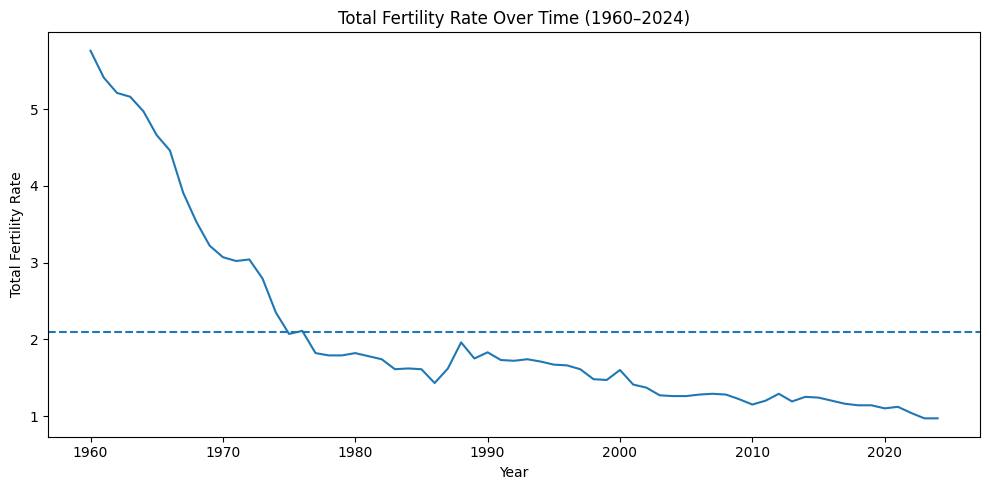

In [64]:
# Plot Total Fertility Rate over time
plt.figure(figsize=(10, 5))
plt.plot(tfr_long["Year"], tfr_long["Total_Fertility_Rate"])

# Add replacement level reference line
plt.axhline(y=2.1, linestyle="--")

plt.xlabel("Year")
plt.ylabel("Total Fertility Rate")
plt.title("Total Fertility Rate Over Time (1960–2024)")

plt.tight_layout()
plt.show()

The time-series plot shows a sharp drop in Total Fertility Rate between 1960 and the mid-1970s.  
After that, the decline continues but at a slower pace over the following decades.

Fertility never returns to its earlier high levels during the rest of the period.  
The dashed horizontal line shows the replacement level of 2.1. From the mid-1970s onwards, TFR stays below 2.1.

This means fertility has been below replacement level for many years, and population growth cannot be sustained by births alone.


#### Total Fertility Rate – Replacement Threshold


In [65]:
# Identify the first year TFR fell below replacement level (2.1)
below_replacement = tfr_long[tfr_long["Total_Fertility_Rate"] < 2.1]

first_year = below_replacement.iloc[0]["Year"]
first_value = below_replacement.iloc[0]["Total_Fertility_Rate"]

print("First year TFR fell below replacement level:", first_year)
print("TFR value in that year:", first_value)

First year TFR fell below replacement level: 1975
TFR value in that year: 2.07


Total Fertility Rate first falls below the replacement level of 2.1 in 1975, at 2.07.


#### Total Fertility Rate – Rate of Change


In [66]:
# Calculate year-on-year change in TFR
tfr_long["YoY_Change"] = tfr_long["Total_Fertility_Rate"].diff()

# Compute average yearly change
average_decline = tfr_long["YoY_Change"].mean()

print("Average yearly change in TFR:", round(average_decline, 3))

Average yearly change in TFR: -0.075


The average year-on-year change in Total Fertility Rate is –0.075.  
This shows that, on average, fertility declines slightly each year over the period studied.

The first year has a missing value because the year-on-year change cannot be calculated without a previous year.  
It is therefore excluded from the average calculation.


#### Total Fertility Rate – Structural Shift


In [67]:
# Early period (1960–1980)
early_period = tfr_long[(tfr_long["Year"] >= 1960) & (tfr_long["Year"] <= 1980)]
early_decline = early_period["YoY_Change"].mean()

# Recent period (2000–2024)
recent_period = tfr_long[tfr_long["Year"] >= 2000]
recent_decline = recent_period["YoY_Change"].mean()

print("Average yearly change in TFR (1960–1980):", round(early_decline, 3))
print("Average yearly change in TFR (2000–2024):", round(recent_decline, 3))

Average yearly change in TFR (1960–1980): -0.197
Average yearly change in TFR (2000–2024): -0.02


The decline in fertility is much steeper between 1960 and 1980, with an average yearly decline of –0.197.
In comparison, from 2000 to 2024, the average yearly decline is much smaller at –0.020.

This shows that most of the sharp decline in fertility happens earlier, followed by a long period where fertility remains low and declines gradually.


#### Total Resident Live Births – Volume Trend


In [68]:
# Calculate total births per year
total_births_per_year = births_long.groupby("Year")["Birth_Count"].sum().reset_index()

# Identify peak and lowest total births
peak_year = total_births_per_year.loc[
    total_births_per_year["Birth_Count"].idxmax(), "Year"
]
peak_value = total_births_per_year["Birth_Count"].max()

lowest_year = total_births_per_year.loc[
    total_births_per_year["Birth_Count"].idxmin(), "Year"
]
lowest_value = total_births_per_year["Birth_Count"].min()

# Calculate percentage decline
percent_decline_births = ((peak_value - lowest_value) / peak_value) * 100

print("Peak total births:", peak_value, "Year:", peak_year)
print("Lowest total births:", lowest_value, "Year:", lowest_year)
print("Percentage decline in total births:", round(percent_decline_births, 2), "%")

Peak total births: 99570 Year: 1990
Lowest total births: 61031 Year: 2023
Percentage decline in total births: 38.71 %


Total resident live births peak at 99,570 in 1990 and fall to 61,031 in 2023, which is a 38.71% decrease.  
This shows a clear decline in overall birth numbers over the past three decades.


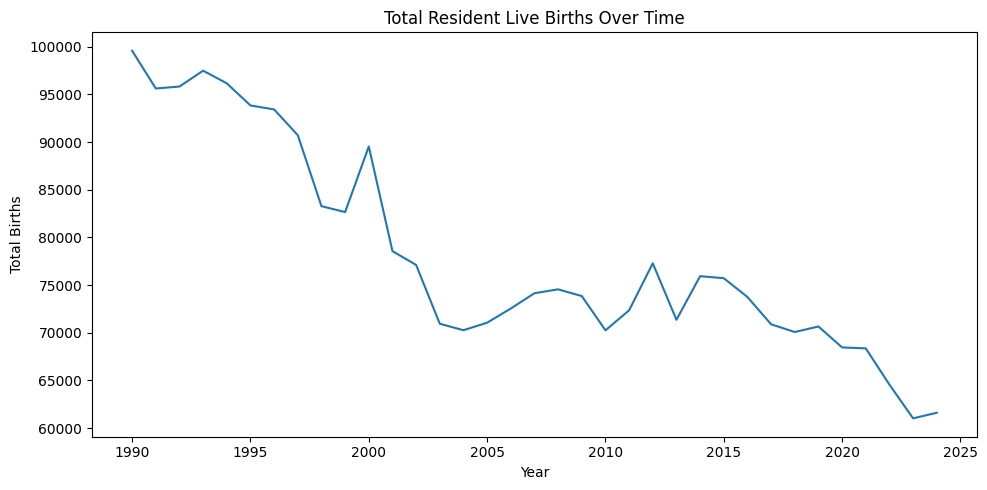

In [69]:
# Plot total births over time
plt.figure(figsize=(10, 5))
plt.plot(total_births_per_year["Year"], total_births_per_year["Birth_Count"])

plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Total Resident Live Births Over Time")

plt.tight_layout()
plt.show()

#### Birth Order Composition – Structural Change


In [70]:
# Exclude total row to retain birth order categories only
births_filtered = births_long[
    births_long["Data Series"] != "Resident Live-Births By Birth Order"
]

# Merge yearly total births
births_with_total = births_filtered.merge(
    total_births_per_year,
    on="Year",
    how="left",
    suffixes=("", "_Total"),
)

# Calculate share of each birth order
births_with_total["Birth_Share"] = (
    births_with_total["Birth_Count"] / births_with_total["Birth_Count_Total"]
)

# Extract shares for 1990 and 2023
births_1990 = births_with_total[births_with_total["Year"] == 1990][
    ["Data Series", "Birth_Share"]
].reset_index(drop=True)

births_2023 = births_with_total[births_with_total["Year"] == 2023][
    ["Data Series", "Birth_Share"]
].reset_index(drop=True)

# Merge comparison properly (safer than assuming same order)
comparison = births_1990.merge(
    births_2023, on="Data Series", suffixes=("_1990", "_2023")
)

comparison

,Data Series,Birth_Share_1990,Birth_Share_2023
0,1st Order,0.198514,0.231587
1,2nd Order,0.178407,0.178106
2,3rd Order,0.094145,0.060936
3,4th Order,0.022115,0.018761
4,5th And Higher Order,0.006799,0.010568


The share of first-order births increases from 19.85% in 1990 to 23.16% in 2023.  
At the same time, third-order births decline from 9.41% to 6.09%, and fourth-order births also fall slightly.

This suggests that more families are stopping at one child, and fewer are having three or more children. Overall, family sizes appear to be getting smaller.


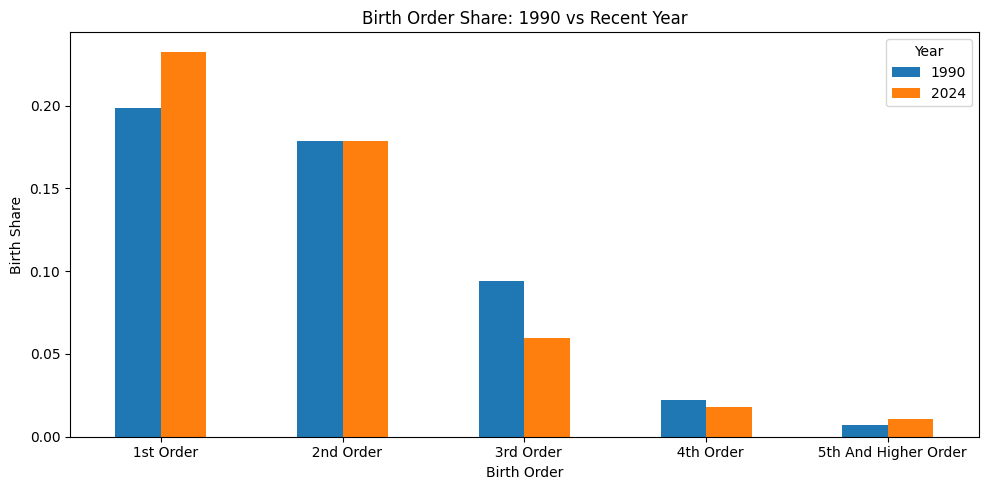

In [71]:
# Select two comparison years
comparison_years = births_with_total[
    births_with_total["Year"].isin([1990, births_with_total["Year"].max()])
]

# Pivot for bar chart
comparison_pivot = comparison_years.pivot(
    index="Data Series", columns="Year", values="Birth_Share"
)

# Plot bar chart
comparison_pivot.plot(kind="bar", figsize=(10, 5))

plt.xlabel("Birth Order")
plt.ylabel("Birth Share")
plt.title("Birth Order Share: 1990 vs Recent Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Fertility and Birth Volume – Correlation Analysis


In [72]:
# Merge TFR and total births on overlapping years
merged = pd.merge(tfr_long, total_births_per_year, on="Year", how="inner")

# Calculate correlation
correlation = merged["Total_Fertility_Rate"].corr(merged["Birth_Count"])

print("Correlation between TFR and total births:", round(correlation, 3))

Correlation between TFR and total births: 0.988


The correlation between Total Fertility Rate and total resident live births is 0.988, which shows a very strong positive relationship.

This is expected because Total Fertility Rate is derived from live birth data, so total birth counts are not independent of the fertility measure.

So the strong correlation mainly reflects how the measure is constructed, rather than showing that one directly causes the other.


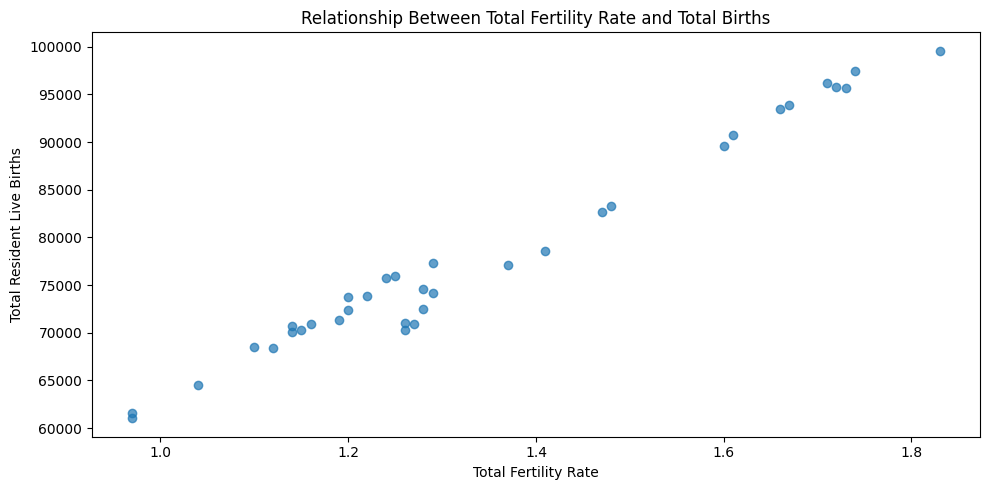

In [73]:
# Scatter plot for relationship
plt.figure(figsize=(10, 5))
plt.scatter(
    merged["Total_Fertility_Rate"],
    merged["Birth_Count"],
    alpha=0.7,  # Add some transparency to points for better visibility
)

plt.xlabel("Total Fertility Rate")
plt.ylabel("Total Resident Live Births")
plt.title("Relationship Between Total Fertility Rate and Total Births")

plt.tight_layout()
plt.show()

### Summary of Exploratory Findings

The exploratory analysis shows a long-term decline in fertility in Singapore.

Total Fertility Rate (TFR) falls sharply between 1960 and the mid-1970s. After this period, fertility continues to decline but at a slower pace. From 1975 onwards, TFR remains below the replacement level of 2.1 and does not return above it for the rest of the period.

Year-on-year changes in TFR show that fertility declines gradually on average, although the rate of change is not uniform over time. The decline is steeper in earlier decades and becomes more gradual in more recent years.

Total resident live births also decline over time. Birth volumes peak in the early 1990s and trend downward thereafter, with fewer births recorded in recent years.

Analysis of birth order composition shows a shift in the structure of births. First-order births account for a larger share of total births over time, while higher-order births make up a smaller proportion. This suggests a long-term change in family size patterns.

Correlation analysis shows a very strong positive relationship between Total Fertility Rate and total resident live births. This is expected, as TFR is derived from live birth data and the two measures are not independent. The correlation reflects how the measures are constructed rather than a causal relationship.

Overall, the EDA indicates a long-term shift towards persistently low fertility, declining birth volumes, and smaller family sizes. These patterns provide context for the feature engineering and predictive modelling that follow.


<a id="feature-engineering"></a>

## Feature Engineering

This section creates additional variables from the Total Fertility Rate (TFR) dataset to support predictive modelling.

Since the data is annual, the new features focus on capturing how fertility changes over time.

The following variables will be created:

- Lag variables using TFR values from previous years
- A year-on-year change variable
- A time index to represent the overall trend

Three lag variables are included to capture fertility levels from the past few years. Fertility usually changes gradually rather than suddenly, so including a few previous years helps the model account for this pattern as additional lags add complexity without improving the model.

The year-on-year change variable captures short-term movement between consecutive years.

The time index represents the overall downward trend across the full period.

Modelling focuses on TFR rather than total birth counts because TFR reflects fertility behaviour directly, while birth counts are also affected by population size.


#### Modelling dataset and time index

This step creates a clean dataset for modelling using the prepared TFR data.

A time index variable is added to represent the overall trend across the years.


In [74]:
# Select modelling columns
tfr_features = tfr_long[["Year", "Total_Fertility_Rate"]].copy()

# Create sequential time index
tfr_features["Time_Index"] = range(len(tfr_features))

#### Lag variables

This step creates lag variables so the dataset includes TFR values from previous years.


In [75]:
# Lag variables (prior-year TFR values)
tfr_features["TFR_Lag_1"] = tfr_features["Total_Fertility_Rate"].shift(1)
tfr_features["TFR_Lag_2"] = tfr_features["Total_Fertility_Rate"].shift(2)
tfr_features["TFR_Lag_3"] = tfr_features["Total_Fertility_Rate"].shift(3)

Three lag variables are included using TFR values from the previous one, two, and three years. Using much longer lags would reduce the usable data points in an already small dataset, without adding meaningful information.


#### Annual change variable

This step creates a variable that measures how TFR changes from one year to the next.


In [76]:
# Annual change (year-on-year variation)
tfr_features["TFR_Annual_Change"] = tfr_features["Total_Fertility_Rate"].diff()

#### Remove lag-related missing values and preview final features

This step removes rows that contain missing values caused by the lag variables.

It also checks the final feature set to make sure the dataset is clean and ready for modelling.


In [77]:
# Remove rows affected by lag/diff missing values
tfr_features = tfr_features.dropna().reset_index(drop=True)

# Preview final feature set
tfr_features.head()

,Year,Total_Fertility_Rate,Time_Index,TFR_Lag_1,TFR_Lag_2,TFR_Lag_3,TFR_Annual_Change
0,1963,5.16,3,5.21,5.41,5.76,-0.05
1,1964,4.97,4,5.16,5.21,5.41,-0.19
2,1965,4.66,5,4.97,5.16,5.21,-0.31
3,1966,4.46,6,4.66,4.97,5.16,-0.20
4,1967,3.91,7,4.46,4.66,4.97,-0.55


<a id="predictive-model"></a>

## Predictive Modelling

This section builds a predictive model using the engineered TFR dataset.

The aim is to forecast TFR using past values and the time index. The model uses lagged TFR variables to capture how fertility tends to move gradually over time.

The goal is to build a simple and interpretable time-series regression model and compare it against a basic baseline model that uses the previous year’s TFR (lag-1).

The following steps will be carried out:

- Define the target variable and feature set
- Split the data into training and test sets using a time-aware split
- Create a lag-1 baseline model
- Fit a regression model using the lag features
- Generate predictions for the test period
- Evaluate performance using error metrics
- Compare results against the baseline
- Interpret the model results in relation to the project goals

The results help assess how well the model performs while recognising that fertility tends to follow past patterns.


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

### Define Target Variable and Train–Test Split

The dataset is split based on time so that the order of the years is not mixed.

The last 10 years will be used as the test set to evaluate how well the model performs on unseen data.

Only historical and lagged TFR values will be used as features to avoid data leakage, ensuring that the model is trained and evaluated using information that would have been available at the time of prediction.


In [79]:
# Define target variable
y = tfr_features["Total_Fertility_Rate"]

# Define feature set (remove leakage feature)
X = tfr_features[["Time_Index", "TFR_Lag_1", "TFR_Lag_2", "TFR_Lag_3"]]

# Time-aware split (last 10 years as test set)
split_index = -10

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print("Training observations:", len(X_train))
print("Test observations:", len(X_test))

Training observations: 52
Test observations: 10


The dataset contains 62 observations after feature engineering.

The data is split based on time. The last 10 years are used as the test set, and the remaining 52 years are used for training.

This ensures the model is trained only on past data and tested on future data, which reflects how forecasting would work in practice.


### Naïve Persistence Baseline (Lag-1 TFR)

A simple baseline model using the previous year’s TFR (lag-1) as the prediction for the current year.


In [80]:
# Baseline prediction using previous year's TFR (Lag-1)
baseline_predictions = X_test["TFR_Lag_1"]

# Evaluate baseline performance
baseline_mae = mean_absolute_error(y_test, baseline_predictions)
baseline_mse = mean_squared_error(y_test, baseline_predictions)
baseline_rmse = baseline_mse**0.5
baseline_r2 = r2_score(y_test, baseline_predictions)

print("Baseline MAE:", round(baseline_mae, 4))
print("Baseline RMSE:", round(baseline_rmse, 4))
print("Baseline R²:", round(baseline_r2, 4))

Baseline MAE: 0.032
Baseline RMSE: 0.0412
Baseline R²: 0.7689


The naïve lag-1 baseline gives a Mean Absolute Error (MAE) of 0.032, a Root Mean Squared Error (RMSE) of 0.0412, and an R² of 0.7689.

The R² value shows that about 77% of the variation in TFR during the test period can be explained just by using the previous year’s value.

This means TFR tends to follow its recent past quite closely. Any regression model should perform better than this baseline to show that the extra features actually add value.


### Linear Regression Model

A linear regression model is fitted using the lag variables and the time index.

The aim is to see whether using several previous years of TFR, together with a general time trend, improves predictions compared to the simple lag-1 baseline.

Linear regression was chosen as a simple, interpretable model to test whether learning a relationship from past fertility values could improve prediction over a naïve baseline. More complex models were not used due to the small sample size and limited number of predictors.


In [81]:
# Initialise linear regression model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

# Generate predictions on test data
model_predictions = model.predict(X_test)

# Evaluate model performance
model_mae = mean_absolute_error(y_test, model_predictions)
model_mse = mean_squared_error(y_test, model_predictions)
model_rmse = model_mse**0.5
model_r2 = r2_score(y_test, model_predictions)

print("Model MAE:", round(model_mae, 4))
print("Model RMSE:", round(model_rmse, 4))
print("Model R²:", round(model_r2, 4))

Model MAE: 0.0394
Model RMSE: 0.0477
Model R²: 0.6901


The linear regression model gives a Mean Absolute Error (MAE) of 0.0394, a Root Mean Squared Error (RMSE) of 0.0477, and an R² of 0.6901 on the test set.

Although the R² value is positive, the linear regression model performs worse than the naïve lag-1 baseline, which achieves a higher R² (0.7689) and lower prediction errors.

Since the lag-1 baseline already provides stronger predictive performance, additional lag variables (such as lag-2 or lag-3) were not included in further models. This indicates that fitting a linear regression model with lag-1 TFR and a time index does not improve short-term prediction compared to simply using the previous year’s TFR.


### Including External Economic Driver – HDB Resale Index

The earlier models only use past TFR values and a time trend to make predictions.

To explore whether economic factors may also affect fertility, the HDB Resale Price Index is added as an extra variable.

Housing prices can influence decisions about marriage, finances, and having children. If housing becomes more expensive, it may affect fertility choices.

This section checks whether adding the HDB Resale Index improves prediction performance compared to the model that only uses lagged TFR values.


In [82]:
# Load HDB Resale Price Index dataset
hdb_df = pd.read_csv("../data_cleaned/raw/M212161/M212161-table extract.csv")

hdb_df.head()

,Data Series,2025 4Q,2025 3Q,2025 2Q,2025 1Q,2024 4Q,2024 3Q,2024 2Q,2024 1Q,2023 4Q,...,1992 2Q,1992 1Q,1991 4Q,1991 3Q,1991 2Q,1991 1Q,1990 4Q,1990 3Q,1990 2Q,1990 1Q
0,HDB Resale Price Index,203.6,203.7,202.9,201,197.9,192.9,187.9,183.7,180.4,...,27.4,25.8,25.1,25.2,25.5,24.9,24.7,25,24.4,24.3


In [83]:
# Check structure of HDB dataset
print("HDB Shape:", hdb_df.shape)

print("\nHDB Info:")
hdb_df.info()

HDB Shape: (1, 145)

HDB Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 145 entries, Data Series to 1990 1Q 
dtypes: float64(130), int64(14), object(1)
memory usage: 1.3+ KB


In [84]:
# Check for missing values
print("HDB Missing Values:")
print(hdb_df.isnull().sum())

# Check for duplicate rows
print("\nHDB Duplicates:", hdb_df.duplicated().sum())

# Remove duplicates if any exist
hdb_df = hdb_df.drop_duplicates()

# Validate numeric value ranges
hdb_numeric = hdb_df.select_dtypes(include=["number"])

print("\nHDB Minimum Value:", hdb_numeric.min().min())
print("HDB Maximum Value:", hdb_numeric.max().max())

HDB Missing Values:
Data Series    0
2025 4Q        0
2025 3Q        0
2025 2Q        0
2025 1Q        0
              ..
1991 1Q        0
1990 4Q        0
1990 3Q        0
1990 2Q        0
1990 1Q        0
Length: 145, dtype: int64

HDB Duplicates: 0

HDB Minimum Value: 24.3
HDB Maximum Value: 203.7


In [85]:
# Reshape HDB from wide to long format
hdb_long = pd.melt(
    hdb_df, id_vars="Data Series", var_name="Quarter", value_name="HDB_Resale_Index"
)

# Sort by Quarter ascending
hdb_long = hdb_long.sort_values("Quarter").reset_index(drop=True)

hdb_long.head()

,Data Series,Quarter,HDB_Resale_Index
0,HDB Resale Price Index,1990 1Q,24.3
1,HDB Resale Price Index,1990 2Q,24.4
2,HDB Resale Price Index,1990 3Q,25.0
3,HDB Resale Price Index,1990 4Q,24.7
4,HDB Resale Price Index,1991 1Q,24.9


In [86]:
# Extract Year from Quarter column
hdb_long["Year"] = hdb_long["Quarter"].str[:4].astype(int)

hdb_long.head()

,Data Series,Quarter,HDB_Resale_Index,Year
0,HDB Resale Price Index,1990 1Q,24.3,1990
1,HDB Resale Price Index,1990 2Q,24.4,1990
2,HDB Resale Price Index,1990 3Q,25.0,1990
3,HDB Resale Price Index,1990 4Q,24.7,1990
4,HDB Resale Price Index,1991 1Q,24.9,1991


### Frequency Alignment

The HDB dataset is reported quarterly, while the TFR dataset is annual.

To make them comparable, the quarterly HDB values are converted into annual averages. This allows both datasets to be analysed on the same yearly basis.

The four quarterly values within each year will be averaged to produce one annual housing price index for modelling.


In [87]:
# Convert quarterly HDB index to annual average
hdb_annual = hdb_long.groupby("Year")["HDB_Resale_Index"].mean().reset_index()

# Sort by Year ascending
hdb_annual = hdb_annual.sort_values("Year").reset_index(drop=True)

hdb_annual.head()

,Year,HDB_Resale_Index
0,1990,24.600
1,1991,25.175
2,1992,27.450
3,1993,41.625
4,1994,52.875


In [88]:
print("HDB Long Shape:", hdb_long.shape)
print("HDB Annual Shape:", hdb_annual.shape)

print("\nHDB Annual Preview:")
print(hdb_annual.head())

HDB Long Shape: (144, 4)
HDB Annual Shape: (36, 2)

HDB Annual Preview:
   Year  HDB_Resale_Index
0  1990            24.600
1  1991            25.175
2  1992            27.450
3  1993            41.625
4  1994            52.875


### HDB Data Validation Summary

The HDB Resale Price Index dataset is checked for structure, missing values, and duplicate rows.

No missing values or duplicate rows are found.

The index values range from 24.3 to 203.7, which reflects the long-term increase in resale flat prices over the period studied.

The data types are appropriate for analysis, with `Year` stored as an integer and `HDB_Resale_Index` stored as a float.

Overall, the dataset is clean and ready to be merged with the TFR modelling dataset.


In [89]:
print("TFR Year Range:", tfr_features["Year"].min(), "-", tfr_features["Year"].max())

print("HDB Year Range:", hdb_annual["Year"].min(), "-", hdb_annual["Year"].max())

TFR Year Range: 1963 - 2024
HDB Year Range: 1990 - 2025


### Overlapping Year Alignment

The TFR modelling dataset covers 1963–2024, while the HDB annual dataset covers 1990–2025.  
Since HDB data is only available from 1990 onwards, the modelling dataset is restricted to the overlapping period from 1990 to 2024 when the HDB Resale Price Index is included.


In [90]:
# Save cleaned HDB annual dataset
hdb_annual.to_csv("../data_cleaned/hdb_annual_cleaned.csv", index=False)

print("Cleaned HDB file saved")

Cleaned HDB file saved


In [91]:
# Create data dictionary for HDB dataset
hdb_dictionary = pd.DataFrame(
    {
        "Column Name": ["Year", "HDB_Resale_Index"],
        "Data Type": [
            str(hdb_annual["Year"].dtype),
            str(hdb_annual["HDB_Resale_Index"].dtype),
        ],
        "Description": [
            "Calendar year",
            "Annual average HDB Resale Price Index",
        ],
        "Unit of Measurement": ["Year", "Index (Base 100)"],
    }
)

hdb_dictionary.to_csv("../data_cleaned/hdb_data_dictionary.csv", index=False)
hdb_dictionary

,Column Name,Data Type,Description,Unit of Measurement
0,Year,int64,Calendar year,Year
1,HDB_Resale_Index,float64,Annual average HDB Resale Price Index,Index (Base 100)


### Merge HDB with TFR Feature Dataset

The HDB Resale Price Index will be merged with the TFR feature dataset using `Year` as the key.  
The resulting dataset will includes the lag features, time index, and HDB index, and will be used for the extended regression model.


In [92]:
# Identify overlapping year range dynamically
min_hdb_year = hdb_annual["Year"].min()
max_hdb_year = hdb_annual["Year"].max()

# Restrict TFR features to overlapping years
tfr_hdb = tfr_features[
    (tfr_features["Year"] >= min_hdb_year) & (tfr_features["Year"] <= max_hdb_year)
].copy()

# Merge HDB annual index
tfr_hdb = pd.merge(
    tfr_hdb, hdb_annual[["Year", "HDB_Resale_Index"]], on="Year", how="inner"
)

tfr_hdb.head()

,Year,Total_Fertility_Rate,Time_Index,TFR_Lag_1,TFR_Lag_2,TFR_Lag_3,TFR_Annual_Change,HDB_Resale_Index
0,1990,1.83,30,1.75,1.96,1.62,0.08,24.600
1,1991,1.73,31,1.83,1.75,1.96,-0.10,25.175
2,1992,1.72,32,1.73,1.83,1.75,-0.01,27.450
3,1993,1.74,33,1.72,1.73,1.83,0.02,41.625
4,1994,1.71,34,1.74,1.72,1.73,-0.03,52.875


In [93]:
tfr_hdb[["Time_Index", "HDB_Resale_Index"]].corr()

,Time_Index,HDB_Resale_Index
Time_Index,1.000000,0.936309
HDB_Resale_Index,0.936309,1.000000


In [94]:
# Define target
y_ext = tfr_hdb["Total_Fertility_Rate"]

# Define feature set
X_ext = tfr_hdb[
    ["Time_Index", "TFR_Lag_1", "TFR_Lag_2", "TFR_Lag_3", "HDB_Resale_Index"]
]

In [95]:
# Time-aware split
split_index = -10

X_train_ext, X_test_ext = X_ext.iloc[:split_index], X_ext.iloc[split_index:]
y_train_ext, y_test_ext = y_ext.iloc[:split_index], y_ext.iloc[split_index:]

In [96]:
# Fit linear regression model
model_ext = LinearRegression()
model_ext.fit(X_train_ext, y_train_ext)

# Predict
pred_ext = model_ext.predict(X_test_ext)

# Evaluate
mae_ext = mean_absolute_error(y_test_ext, pred_ext)
rmse_ext = mean_squared_error(y_test_ext, pred_ext) ** 0.5
r2_ext = r2_score(y_test_ext, pred_ext)

print("Extended Model MAE:", round(mae_ext, 4))
print("Extended Model RMSE:", round(rmse_ext, 4))
print("Extended Model R²:", round(r2_ext, 4))

Extended Model MAE: 0.1623
Extended Model RMSE: 0.1676
Extended Model R²: -2.8166


<a id="model-performance"></a>

### Model Performance – Extended Model with HDB

These results are much worse than both the lag-1 baseline and the earlier regression model.

Before modelling, the correlation between `Time_Index` and `HDB_Resale_Index` is very high (r ≈ 0.94).  
This means both variables move closely together over time.

Adding the HDB variable did not improve the model and made test predictions worse.

The negative R² shows that this model performs worse than predicting the average TFR.
In this model, past TFR values matter more than housing prices for short-term prediction.


## Model Evaluation

Model performance is evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² on the test set.

MAE measures the average absolute prediction error.  
RMSE penalises larger errors more heavily.  
R² compares model performance against predicting the average value.

All models are evaluated on the same test period to allow direct comparison.  
The lag-1 baseline is used as the main benchmark.  
Models are only considered useful if they improve on this baseline.


In [97]:
# Create comparison table dynamically from computed metrics
model_comparison = pd.DataFrame(
    {
        "Model": [
            "Naïve Lag-1 Baseline",
            "Lag Regression Model",
            "Extended Model (Lag + HDB Index)",
        ],
        "MAE": [round(baseline_mae, 4), round(model_mae, 4), round(mae_ext, 4)],
        "RMSE": [round(baseline_rmse, 4), round(model_rmse, 4), round(rmse_ext, 4)],
        "R²": [round(baseline_r2, 4), round(model_r2, 4), round(r2_ext, 4)],
    }
)

model_comparison

,Model,MAE,RMSE,R²
0,Naïve Lag-1 Baseline,0.0320,0.0412,0.7689
1,Lag Regression Model,0.0394,0.0477,0.6901
2,Extended Model (Lag + HDB Index),0.1623,0.1676,-2.8166


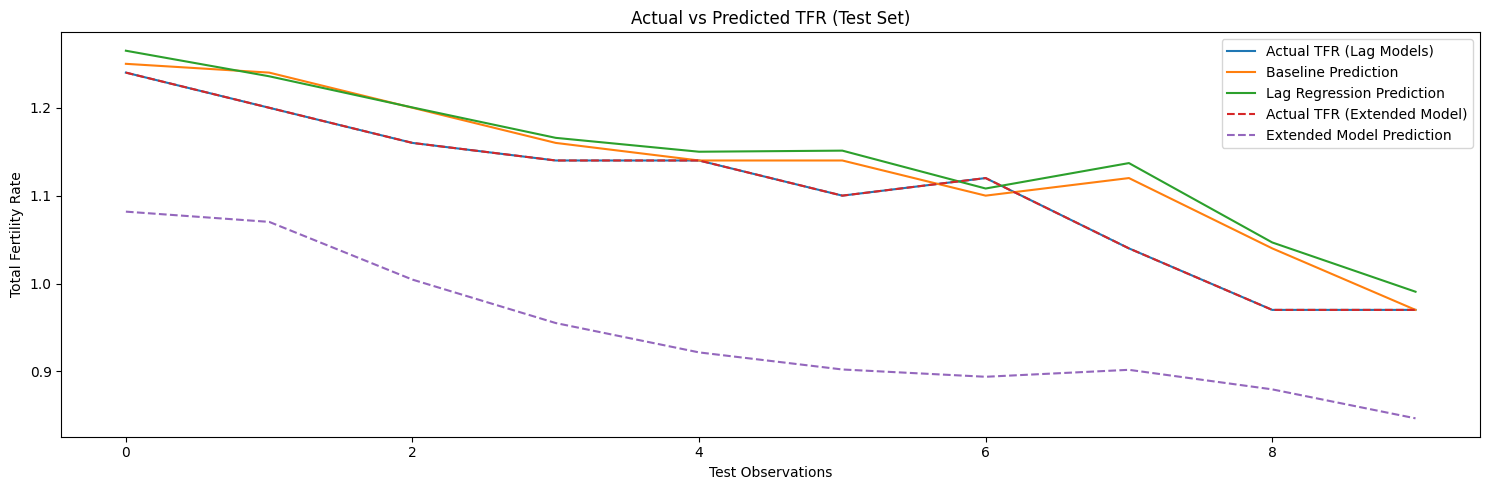

In [98]:
plt.figure(figsize=(15, 5))

# Plot actual values for each corresponding test set
plt.plot(y_test.values, label="Actual TFR (Lag Models)")
plt.plot(baseline_predictions.values, label="Baseline Prediction")
plt.plot(model_predictions, label="Lag Regression Prediction")

# Plot extended model separately if test set differs
plt.plot(y_test_ext.values, linestyle="--", label="Actual TFR (Extended Model)")
plt.plot(pred_ext, linestyle="--", label="Extended Model Prediction")

plt.title("Actual vs Predicted TFR (Test Set)")
plt.xlabel("Test Observations")
plt.ylabel("Total Fertility Rate")
plt.legend()

plt.tight_layout()
plt.show()

<a id="model-interpretation"></a>

## Model Interpretation

The results show that short-term fertility changes are strongly driven by the previous year’s value.

The naïve lag-1 baseline produces the lowest prediction errors and the highest R². This means that last year’s TFR already provides a strong short-term prediction.

The linear regression model using lag-1 TFR and a time index does not improve accuracy. Learning a linear relationship does not perform better than simply using the previous year’s value.

The extended model that includes the HDB Resale Price Index performs much worse. The HDB index is highly correlated with the time trend (r ≈ 0.94), which causes instability and poorer predictions.

Overall, increasing model complexity did not improve performance. In this setup, short-term fertility movements are mainly explained by past TFR values, not by housing prices.


<a id="assumptions"></a>

## Assumptions

The modelling approach assumes that fertility changes gradually over time and that recent historical values provide useful information for short-term prediction.

It is also assumed that annual data is sufficient to capture meaningful fertility trends, even though shorter-term changes within each year are not observed.

The linear regression model assumes an approximately linear relationship between the predictors and Total Fertility Rate, and that errors are independent across years.


<a id="limitations"></a>

## Limitations

After feature engineering, the modelling dataset contains 62 annual observations. This limits model complexity and increases sensitivity to noise.

The analysis uses national-level annual data, which may hide variation across age groups, cohorts, or shorter time periods.

Policy measures, immigration effects, and population age structure are not explicitly included in the models.

The HDB Resale Price Index is highly correlated with time, which limits its usefulness in a simple linear regression framework.


<a id="next-steps"></a>

## Conclusions and Next Steps

This analysis shows a clear long-term decline in fertility in Singapore. Total Fertility Rate has remained below replacement level since the mid-1970s, and total resident live births have declined alongside a shift towards smaller family sizes.

From a modelling perspective, short-term fertility changes are dominated by persistence. A simple lag-1 baseline outperforms linear regression models, and adding the HDB Resale Price Index reduces predictive performance due to multicollinearity.

Next steps could include using age-specific or cohort-based fertility data, incorporating policy timing explicitly, or testing alternative time-series models designed for persistence. Using more disaggregated or higher-frequency data may also provide additional insight.


# [Home](#home)


<a id="technical-report"></a>

# Singapore Birth Rate & Fertility Analysis

### GA Data Analytics Immersive – Capstone Technical Report - Lester

## 01 – Problem Statement, Objectives & Audience

Singapore’s Total Fertility Rate (TFR) and resident live births have declined steadily over the past several decades. This long-term decline raises concerns related to population ageing, labour force sustainability, and long-term economic stability.

This analysis examined historical fertility and birth data to understand the scale, timing, and structure of this decline. In addition, predictive modelling was used to assess whether short-term fertility changes could be forecast using historical data.

The objectives of this project were to analyse long-term trends in fertility and births, identify structural patterns over time, and evaluate the performance of simple predictive models based on past fertility behaviour.

This technical report was written for policymakers and planners involved in population policy, workforce development, and long-term socio-economic planning in Singapore.


## 02 – Data Sources & Data Understanding

The analysis used official Singapore government statistics downloaded in CSV format. Two main datasets were used: Total Fertility Rate (TFR) by year and resident live births by year and birth order.

These datasets were selected because they are directly related to fertility behaviour and birth outcomes, cover long historical periods, and are suitable for time-series analysis. Using official data ensured consistency and reliability across the full time span analysed.

Both datasets provided national-level annual data. While more granular demographic data would allow deeper analysis, national-level data was sufficient to examine long-term structural trends in fertility and births.

In addition, the HDB Resale Price Index was incorporated as a contextual economic indicator in extended modelling to assess its potential explanatory value in relation to fertility trends.


## 03 – Data Preparation & Cleaning

Before analysis, both datasets were validated to ensure they were accurate, consistent, and suitable for time-series analysis and modelling. Data preparation focused on structural checks, data type verification, missing and duplicate value checks, value range validation, and reshaping.

Structural inspection confirmed that the TFR dataset contained yearly values from 1960 to 2024, stored as numeric values, with no missing or duplicate entries. The births dataset contained yearly birth counts by birth order from 1990 to 2024, also with no missing or duplicate values.

Minimum and maximum value checks showed that TFR values ranged from 0.97 to 5.76 and birth counts ranged from 472 to 49,787. These values were consistent with historical fertility patterns in Singapore and did not indicate invalid data.

Both datasets were originally stored in wide format, with each year represented as a separate column. For analysis and modelling, the data was reshaped into long format using `pandas.melt()`. This structure allowed the data to be sorted chronologically, merged across datasets, and used for time-series analysis.

After reshaping, data types were revalidated and no missing values were introduced. Cleaned datasets and corresponding data dictionaries were saved to document variable definitions, data types, and units of measurement.


In [104]:
print("=== Total Fertility Rate Data Dictionary ===")
display(tfr_dictionary)

print("=== Births Data Dictionary ===")
display(births_dictionary)

print("=== HDB Resale Price Index Data Dictionary ===")
display(hdb_dictionary)

=== Total Fertility Rate Data Dictionary ===


,Column Name,Data Type,Description,Unit of Measurement
0,Data Series,object,Fertility indicator name,Text
1,Year,int64,Calendar year,Year
2,Total_Fertility_Rate,float64,Total Fertility Rate (TFR),Live births per female


=== Births Data Dictionary ===


,Column Name,Data Type,Description,Unit of Measurement
0,Data Series,object,Birth order category,Text
1,Year,int64,Calendar year,Year
2,Birth_Count,int64,Number of resident live births,Count


=== HDB Resale Price Index Data Dictionary ===


,Column Name,Data Type,Description,Unit of Measurement
0,Year,int64,Calendar year,Year
1,HDB_Resale_Index,float64,Annual average HDB Resale Price Index,Index (Base 100)


## 04 – Exploratory Data Analysis (EDA)

#### [EDA](#eda)

Exploratory analysis was conducted to examine historical trends in Total Fertility Rate and resident live births. The aim was to describe long-term fertility patterns, changes in birth volumes, shifts in birth order composition, and the relationship between fertility and birth counts.

Total Fertility Rate peaked at 5.76 in 1960 and declined to 0.97 by 2024, representing an overall decline of approximately 83%. The steepest decline occurred between 1960 and the mid-1970s, followed by a slower but persistent decline in later decades.


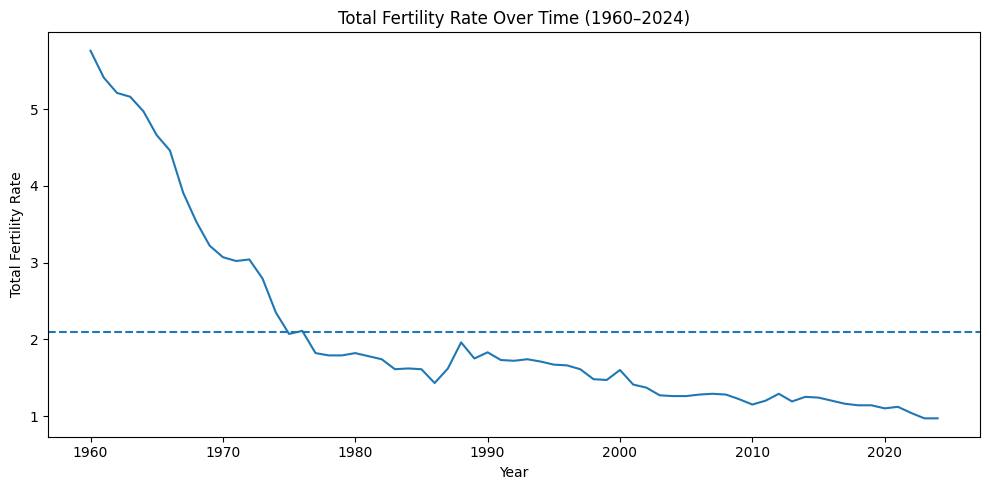

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(tfr_long["Year"], tfr_long["Total_Fertility_Rate"])
plt.axhline(2.1, linestyle="--")

plt.xlabel("Year")
plt.ylabel("Total Fertility Rate")
plt.title("Total Fertility Rate Over Time (1960–2024)")

plt.tight_layout()
plt.show()

A replacement level of 2.1 was used as a reference threshold. TFR first fell below this level in 1975 and remained below replacement for the rest of the observed period. This indicates that population growth has not been sustained by births alone for several decades.

Year-on-year changes in TFR were calculated to assess the pace of decline. The average annual change across the full period was −0.075. When the period was split, the decline was much steeper between 1960 and 1980 than between 2000 and 2024, indicating that most of the sharp fertility decline occurred earlier, followed by a long period of persistently low fertility.


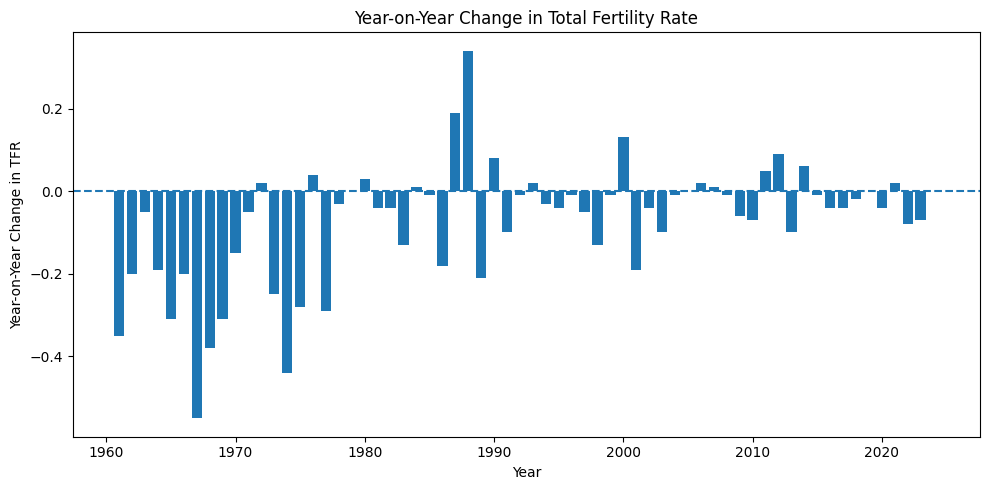

In [101]:
tfr_long["TFR_YoY"] = tfr_long["Total_Fertility_Rate"].diff()

plt.figure(figsize=(10, 5))
plt.bar(tfr_long["Year"], tfr_long["TFR_YoY"])
plt.axhline(0, linestyle="--")

plt.xlabel("Year")
plt.ylabel("Year-on-Year Change in TFR")
plt.title("Year-on-Year Change in Total Fertility Rate")

plt.tight_layout()
plt.show()

Total resident live births peaked at 99,570 in 1990 and declined to 61,031 by 2023, a decrease of approximately 39%. While short-term fluctuations were observed, the overall trend in birth volumes was downward.

Birth order analysis showed a structural shift in family size patterns. Over time, first-order births accounted for a larger share of total births, while higher-order births declined. This suggests that smaller family sizes have become more common.


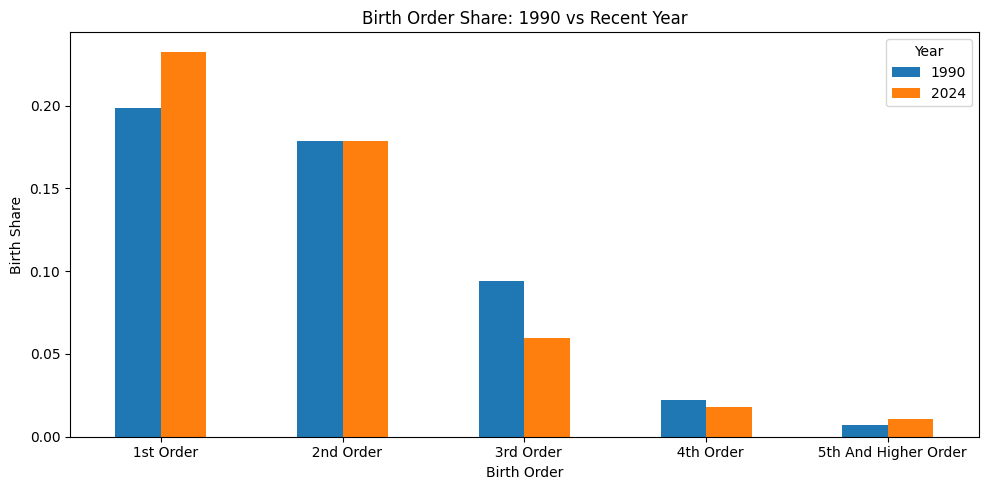

In [102]:
# Select two comparison years
comparison_years = births_with_total[
    births_with_total["Year"].isin([1990, births_with_total["Year"].max()])
]

# Pivot for bar chart
comparison_pivot = comparison_years.pivot(
    index="Data Series", columns="Year", values="Birth_Share"
)

# Plot bar chart
comparison_pivot.plot(kind="bar", figsize=(10, 5))

plt.xlabel("Birth Order")
plt.ylabel("Birth Share")
plt.title("Birth Order Share: 1990 vs Recent Year")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Correlation analysis between TFR and total resident live births showed a very strong positive relationship. This relationship was expected because TFR is derived from live birth data. The correlation reflects how the measures are constructed rather than a causal relationship between fertility behaviour and birth volume.

Overall, the EDA indicated a long-term shift towards persistently low fertility, declining birth volumes, and smaller family sizes. These findings provided context for feature engineering and predictive modelling.


## 05 – Feature Engineering

Feature engineering focused on preparing the Total Fertility Rate dataset for predictive modelling. Given the annual frequency of the data, features were designed to capture temporal persistence, short-term changes, and long-term trends.

A sequential time index was created to represent overall movement across years. Lagged TFR variables from the previous one, two, and three years were included to capture fertility persistence, as fertility behaviour tends to change gradually rather than abruptly. Longer lag structures were not used due to the limited size of the dataset.

A year-on-year change variable was also created to capture short-term fluctuations between consecutive years. Rows affected by lag-related missing values were removed to produce a clean modelling dataset.

Modelling focused on TFR rather than birth counts, as TFR reflects fertility behaviour directly, while birth counts are influenced by population size and composition.


## 06 – Predictive Modelling

Predictive modelling was conducted to assess whether historical fertility patterns could be used to forecast short-term changes in Total Fertility Rate. Model performance was evaluated relative to a naïve lag-1 baseline, which served as a minimum benchmark.

A time-aware train–test split was used to preserve chronological order. The final 10 years of data were reserved as the test set, with the remaining observations used for training. This approach reflected real-world forecasting conditions and avoided information leakage.

The naïve baseline model used the previous year’s TFR as the prediction for the current year. This model produced low prediction errors and a relatively high R², indicating strong year-to-year persistence in fertility.

A linear regression model using lagged TFR values and a time index was then fitted. This model produced higher errors and lower explanatory power than the baseline, indicating that learning a linear relationship did not improve short-term prediction beyond simply using the previous year’s value.

To explore whether economic conditions influenced fertility, the HDB Resale Price Index was added as an external variable. Quarterly HDB values were converted to annual averages to align with the TFR data, and the modelling dataset was restricted to overlapping years.

The extended model performed substantially worse than both the baseline and lag regression models. The HDB index was highly correlated with the time index, leading to multicollinearity and unstable predictions.


## 07 – Model Evaluation & Interpretation

Model performance was evaluated using Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and R² on the same test period for all models.

The naïve lag-1 baseline consistently outperformed the regression-based models. Increased model complexity did not improve predictive accuracy, and the inclusion of the HDB Resale Price Index reduced performance further.

These results indicate that short-term fertility changes are dominated by persistence. Past TFR values explain most short-term variation, while additional predictors do not add meaningful predictive value within this framework.


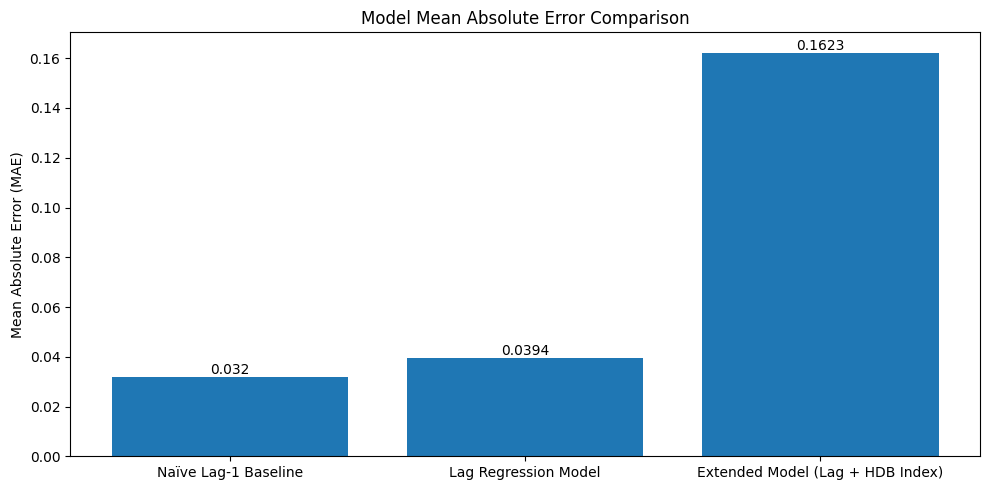

In [103]:
plt.figure(figsize=(10, 5))

bars = plt.bar(model_comparison["Model"], model_comparison["MAE"])

for bar in bars:
    h = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, h, round(h, 4), ha="center", va="bottom"
    )

plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Mean Absolute Error Comparison")
plt.tight_layout()
plt.show()

## 08 – Assumptions & Limitations

The analysis assumed that fertility changes gradually over time and that annual data is sufficient to capture long-term fertility trends. Linear regression assumptions were applied, including approximate linearity and independence of errors.

After feature engineering, the modelling dataset contained 62 annual observations. This limited model complexity and increased sensitivity to noise. The use of national-level data may also mask variation across age groups, cohorts, or demographic subgroups.

Policy effects, immigration dynamics, and population age structure were not explicitly modelled. The strong correlation between time and housing prices limited the usefulness of economic variables in simple regression models.


## 09 – Conclusions & Next Steps

This analysis showed a sustained long-term decline in fertility in Singapore. Total Fertility Rate has remained below replacement level since the mid-1970s, and resident live births have declined alongside a shift towards smaller family sizes.

From a modelling perspective, short-term fertility forecasting was best explained by persistence. A simple lag-1 baseline outperformed more complex regression models, and adding housing price data did not improve predictive performance due to multicollinearity.

Future work could incorporate age-specific or cohort-based fertility data, explicitly model policy timing, or apply alternative time-series approaches designed for persistent behaviour. More granular or higher-frequency data may provide additional insight beyond what is possible with annual national-level data.
